In [1]:
import torch

# Check if CUDA (GPU) is available
if torch.cuda.is_available():
    print("CUDA is available. PyTorch can use the GPU.")
    print("Number of available GPUs:", torch.cuda.device_count())
    print("Current GPU device:", torch.cuda.current_device())
    print("GPU Name:", torch.cuda.get_device_name(torch.cuda.current_device()))
else:
    print("CUDA is not available. PyTorch will use the CPU.")


CUDA is available. PyTorch can use the GPU.
Number of available GPUs: 1
Current GPU device: 0
GPU Name: NVIDIA GeForce RTX 3050 Laptop GPU


In [2]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision.transforms import transforms
import torch.optim as optim
# utils
import os
from glob import glob
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix

In [3]:
dataset_path = "C:/Users/91623/Desktop/Brain_tumor_research/Data"
train_path = "C:/Users/91623/Desktop/Brain_tumor_research/Data/Training"
test_path = "C:/Users/91623/Desktop/Brain_tumor_research/Data/Testing"
image_size = (224,224)
num_classes = 5
train_paths = glob(f"{train_path}/*/*.jpg")
test_paths = glob(f"{test_path}/*/*.jpg")

In [4]:
image_size = (224,224)
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(10),
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [20]:
class dataset(Dataset):
    def __init__(self,paths,transform=None):
        self.paths = paths
        self.transform = transform
        self.labels = [self.get_label(path) for path in self.paths]
        self.labels_to_index = {label:index for index,label in enumerate(list(set(self.labels)))}
    
    def __getitem__(self,index):
        img_path = self.paths[index]
        img = Image.open(img_path).convert('RGB') 
        label = self.labels[index]
        label_index = self.labels_to_index[label]
        
        if self.transform:
            img = self.transform(img)
        
        return img,label_index
    
    
    def __len__(self):
        return len(self.paths)
    
    
    def get_label(self, path):
        return os.path.basename(os.path.dirname(path))


In [21]:

train_dataset = dataset(train_paths, transform=train_transform)
test_dataset = dataset(test_paths, transform=test_transform)

In [22]:
val_dataset, test_dataset = train_test_split(test_dataset,test_size=0.5, random_state=ord("H"))

In [23]:

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

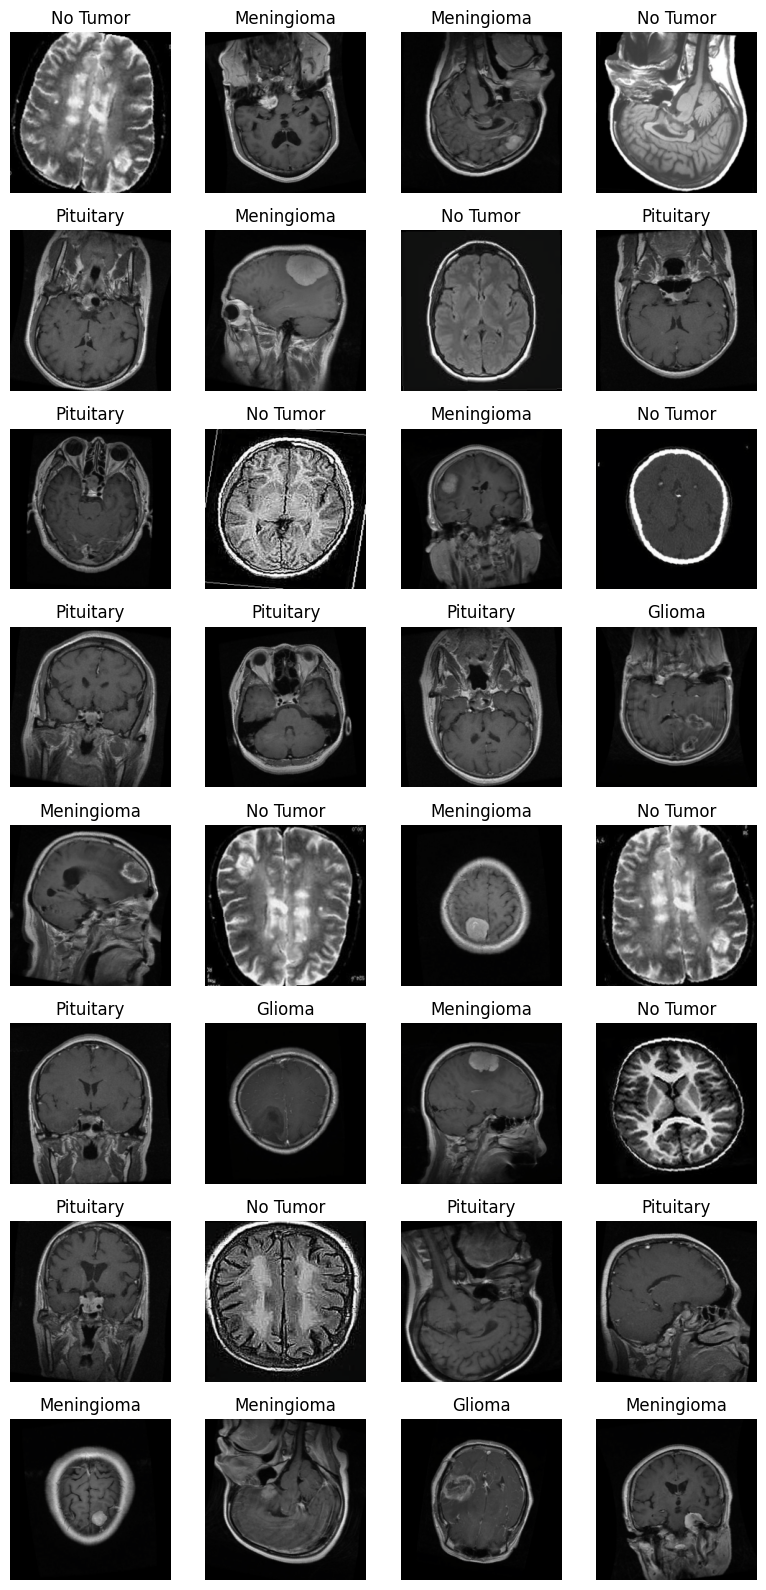

In [11]:

# display sample images with classes
train_iter = iter(train_loader)
images,labels = next(train_iter)

def imshow(input_images,labels):
    label_dict = {"notumor":"No Tumor", "glioma":"Glioma", "meningioma":"Meningioma","pituitary":"Pituitary"}
    input_images=input_images.numpy().transpose((0,2, 3, 1))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input_images = std * input_images + mean
    input_images = np.clip(input_images, 0, 1)
    fig, axes = plt.subplots(8, 4, figsize=(8, 16))
    for i, ax in enumerate(axes.flat):
        ax.imshow(input_images[i])
        ax.axis('off')
        ax.set_title(label_dict[labels[i]], fontsize=12)
    plt.tight_layout()
    plt.show()


imshow(images,labels)

In [24]:
dataiter = iter(train_loader)
batch = next(dataiter)
print(len(batch))

2


In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# class CNNModel(nn.Module):
#     def __init__(self):
#         super(CNNModel,self).__init__()
        
#         self.conv1 = nn.Conv2d(3,32,kernel_size=4,stride=1,padding=0)
#         self.bn1 = nn.BatchNorm2d(32)
        
#         self.conv2 = nn.Conv2d(32,64,kernel_size=4,stride=1,padding=0)
#         self.bn2 = nn.BatchNorm2d(64)
        
#         self.conv3 = nn.Conv2d(64,128,kernel_size=4,stride=1,padding=0)
#         self.bn3 = nn.BatchNorm2d(128)
        
#         self.conv4 = nn.Conv2d(128,128,kernel_size=4,stride=1,padding=0)
#         self.bn4 = nn.BatchNorm2d(128)
        
#         self.pool = nn.MaxPool2d(kernel_size=3, stride=3)
#         self.pool2= nn.MaxPool2d(kernel_size=3, stride=2)
        
#         self.fc1 = nn.Linear(6*6*128,512)
#         self.fc2 = nn.Linear(512,num_classes)
        
#         self.flatten = nn.Flatten()
#         self.relu = nn.ReLU() 
#         self.dropout = nn.Dropout(0.5)
        
        
        
        
#     def forward(self,x):
#         x = self.relu(self.bn1(self.conv1(x)))
#         x = self.pool(x)
#         x = self.relu(self.bn2(self.conv2(x)))
#         x = self.pool(x)
#         x = self.relu(self.bn3(self.conv3(x)))
#         x = self.pool2(x)
#         x = self.relu(self.bn4(self.conv4(x)))
#         x = self.flatten(x)
#         x = self.relu(self.fc1(x))
#         x = self.dropout(x)
#         x = self.fc2(x)
#         return x

In [69]:
# class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

# class TumorModel(nn.Module):
#     def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
#         super().__init__()

#         self.conv_layer1 = nn.Sequential(
#             nn.Conv2d(in_channels=input_shape,
#                       out_channels=hidden_units,
#                       kernel_size=3,
#                       stride=1,
#                       padding=1),
#             nn.ReLU(),
#             nn.Conv2d(in_channels=hidden_units,
#                       out_channels=hidden_units,
#                       kernel_size=3,
#                       stride=1,
#                       padding=1),
#             nn.ReLU(),
#             nn.Conv2d(in_channels=hidden_units,
#                       out_channels=hidden_units,
#                       kernel_size=3,
#                       stride=1,
#                       padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2)
#         )

#         self.conv_layer2 = nn.Sequential(
#             nn.Conv2d(in_channels=hidden_units,
#                       out_channels=hidden_units,
#                       kernel_size=3,
#                       stride=1,
#                       padding=1),
#             nn.ReLU(),
#             nn.Conv2d(in_channels=hidden_units,
#                       out_channels=hidden_units,
#                       kernel_size=3,
#                       stride=1,
#                       padding=1),
#             nn.ReLU(),
#             nn.Conv2d(in_channels=hidden_units,
#                       out_channels=hidden_units,
#                       kernel_size=3,
#                       stride=1,
#                       padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2)
#         )

#         # self.conv_layer3 = nn.Sequential(
#         #     nn.Conv2d(in_channels=hidden_units,
#         #               out_channels=hidden_units,
#         #               kernel_size=3,
#         #               stride=1,
#         #               padding=1),
#         #     nn.ReLU(),
#         #     nn.Conv2d(in_channels=hidden_units,
#         #               out_channels=hidden_units,
#         #               kernel_size=3,
#         #               stride=1,
#         #               padding=1),
#         #     nn.ReLU(),
#         #     nn.MaxPool2d(kernel_size=2)
#         # )

#         self.conv_output_size = hidden_units * (224 // 4) * (224 // 4)

#         self.classifier = nn.Sequential(
#             nn.Flatten(),
#             nn.Linear(in_features=self.conv_output_size,
#                       out_features=output_shape)
#         )

#     def forward(self, x):
#         x = self.conv_layer1(x)
#         x = self.conv_layer2(x)
#         # x = self.conv_layer3(x)
#         # x = torch.flatten(x, 1) 
#         x = self.classifier(x)

#         return x
    

    
# model = TumorModel(input_shape=3,
#                 hidden_units=4,
#                 output_shape=len(class_names)).to(device)

import torch
import torch.nn as nn
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        # Step 1 - Convolution
        self.conv1 = nn.Conv2d(3,32, kernel_size=4, stride=1, padding=0)
        self.bn1 = nn.BatchNorm2d(32)

        # Adding a second convolutional layer
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=0)
        self.bn2 = nn.BatchNorm2d(64)

        self.conv3 = nn.Conv2d(64,128,kernel_size=4,stride=1,padding=0)
        self.bn3 = nn.BatchNorm2d(128)

        self.conv4 = nn.Conv2d(128,128,kernel_size=4,stride=1,padding=0)
        self.bn4 = nn.BatchNorm2d(128)
        
        self.pool = nn.MaxPool2d(kernel_size=3, stride=3)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        # Step 3 - Flattening
        
        # Step 4 - Full Connection
        self.fc1 = nn.Linear(6*6 * 128, 512)  # Calculate the correct input size based on your image size
        self.fc2 = nn.Linear(512, 4)

        self.flatten = nn.Flatten()
        self.relu = nn.ReLU() 
        self.dropout = nn.Dropout(0.5)
        
    def forward(self,x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.pool(x)
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = self.relu(self.bn3(self.conv3(x)))
        x = self.pool2(x)
        x = self.relu(self.bn4(self.conv4(x)))
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Create an instance of the CNN
model = CNNModel().todevice()





AttributeError: 'CNNModel' object has no attribute 'todevice'

In [ ]:

epochs = 40
learning_rate = 0.0001
batch_size=4
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adamax(params=model.parameters(), lr=learning_rate)

def train_epoch():
    model.train()
    total_loss = 0.0 
    total_correct = 0
    total_predictions = 0
    
    for batch_number, (images, labels_indices) in enumerate(train_loader):
        images, labels_indices = images.to(device), labels_indices.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(images)
        loss1 = loss(outputs, labels_indices)
        total_loss += loss1.item()
        
        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total_predictions += labels_indices.size(0)
        total_correct += (predicted == labels_indices).sum().item()
        
        loss1.backward()
        optimizer.step()
        
        if (batch_number and batch_number % 150 == 0):
            c_loss = total_loss / (batch_number + 1)
            accuracy = total_correct / total_predictions
            print(f"Batch {batch_number}/{len(train_loader)}, Loss: {c_loss:0.4f}, Accuracy: {accuracy * 100:.2f}%")
    
    avg_loss = total_loss / len(train_loader)
    avg_accuracy = total_correct / total_predictions
    
    return avg_loss, avg_accuracy

In [ ]:
model = CNNModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.0002)

TypeError: CNNModel.__init__() missing 3 required positional arguments: 'input_shape', 'hidden_units', and 'output_shape'

In [ ]:
# def train_epoch():
#     model.train()
#     total_loss = 0.0 
#     total_correct = 0
#     total_predictions = 0
    
#     for batch_number, (images, labels_indices, labels) in enumerate(train_loader):
#         images, labels_indices = images.to(device), labels_indices.to(device)
        
#         optimizer.zero_grad()
        
#         outputs = model(images)
#         loss = criterion(outputs, labels_indices)
#         total_loss += loss.item()
        
#         # Calculate accuracy
#         _, predicted = torch.max(outputs, 1)
#         total_predictions += labels_indices.size(0)
#         total_correct += (predicted == labels_indices).sum().item()
        
#         loss.backward()
#         optimizer.step()
        
#         if (batch_number and batch_number % 150 == 0):
#             c_loss = total_loss / (batch_number + 1)
#             accuracy = total_correct / total_predictions
#             print(f"Batch {batch_number}/{len(train_loader)}, Loss: {c_loss:0.4f}, Accuracy: {accuracy * 100:.2f}%")
    
#     avg_loss = total_loss / len(train_loader)
#     avg_accuracy = total_correct / total_predictions
    
#     return avg_loss, avg_accuracy

In [71]:
def eval_model():
    model.eval()
    total_loss = 0.0 
    total_correct = 0
    total_predictions = 0
    
    with torch.no_grad():
        for _, (images, labels_indices) in enumerate(val_loader):
            images, labels_indices = images.to(device), labels_indices.to(device)
            
            outputs = model(images)
            loss1 = loss(outputs, labels_indices)
            total_loss += loss1.item()
            
            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total_predictions += labels_indices.size(0)
            total_correct += (predicted == labels_indices).sum().item()
            
    avg_loss = total_loss / len(val_loader)
    avg_accuracy = total_correct / total_predictions
    
    return avg_loss, avg_accuracy

In [72]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [73]:
best_score = float("inf")
n_epochs = 40
tolerance = 0

for epoch in range(n_epochs):
    print(f"Epoch {epoch},   ", end="")
    avg_train_loss, train_accuracy = train_epoch()
    avg_eval_loss, eval_accuracy = eval_model()
    
    # if avg_eval_loss < best_score:
    #     best_score = avg_eval_loss
    #     # torch.save(model.state_dict(), f"model_{epoch+1}")
    #     tolerance = 0
    # else:
    #     tolerance += 1
    #     if tolerance >= 8:
    #         break
            
    train_losses.append(avg_train_loss)
    val_losses.append(avg_eval_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(eval_accuracy)
    
    print(f"Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Eval Loss: {avg_eval_loss:.4f}, Eval Accuracy: {eval_accuracy * 100:.2f}%")

Epoch 0,   Batch 150/179, Loss: 0.7157, Accuracy: 72.91%
Train Loss: 0.7151, Train Accuracy: 72.79%
Eval Loss: 0.8152, Eval Accuracy: 70.69%
Epoch 1,   

KeyboardInterrupt: 

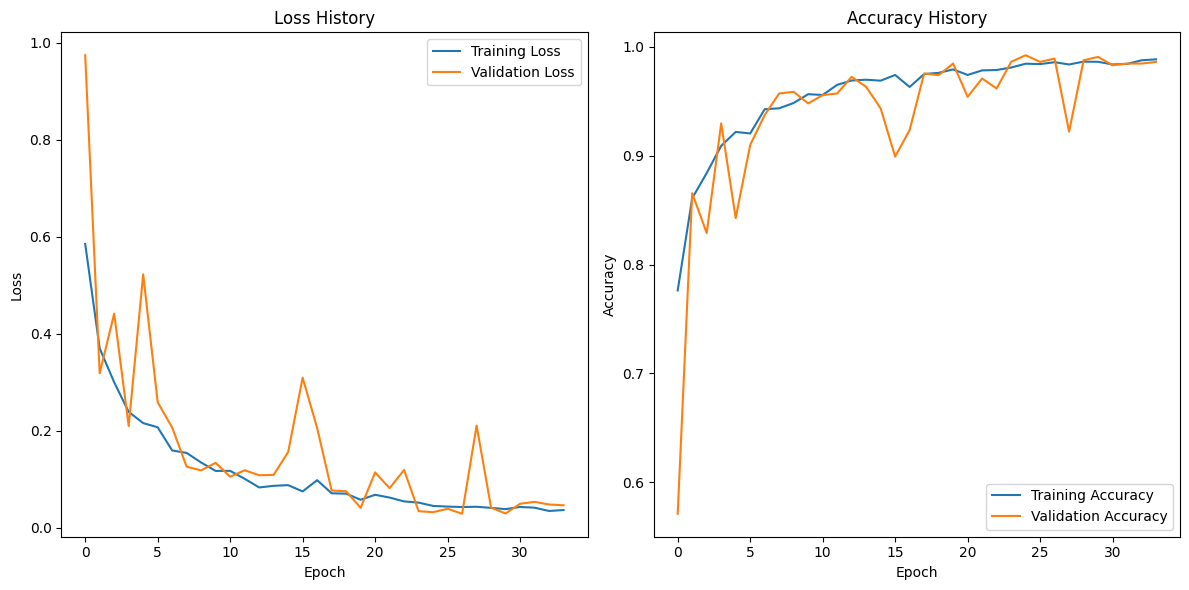

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss History')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy History')

plt.tight_layout()
plt.show()

In [ ]:
models = glob("C:/Users/91623/Desktop/Brain_tumor_research/Model/Fst_cnn/*")
model_num = [int(i.split("_")[-1]) for i in models if i.split("_")[-1].isdigit()]
best_model_path = "C:/Users/91623/Desktop/Brain_tumor_research/Model/Fst_cnn/model_" + str(sorted(model_num)[-1])
best_model_path

'C:/Users/91623/Desktop/Brain_tumor_research/Model/Fst_cnn/model_27'

In [ ]:
best_model = CNNModel().to(device)

best_model.load_state_dict(torch.load(best_model_path, map_location=device))

<All keys matched successfully>

In [ ]:

def predict(
    model:nn.Module, 
    sample_loader:torch.utils.data.DataLoader,
    device:torch.device) -> np.ndarray:
    model.eval()
    predictions = []
    with torch.inference_mode():
        for batch, (X, y,labels) in enumerate(sample_loader):
            X, y = X.to(device), y.to(device)
            y_pred = model(X) 
            predictions.append(y_pred.cpu().numpy())
        
    return np.vstack(predictions)

In [ ]:

best_model_props = predict(best_model, test_loader, device)
best_model_preds = np.argmax(best_model_props, axis=1)
best_model_preds.shape[0]

656

In [ ]:
gen_labels_test_set = [label[1] for label in test_dataset]
len(gen_labels_test_set)

656

In [ ]:
print(f"Best Model Test Accuracy: {round(accuracy_score(gen_labels_test_set,best_model_preds)*100,2)}%")

Best Model Test Accuracy: 97.71%


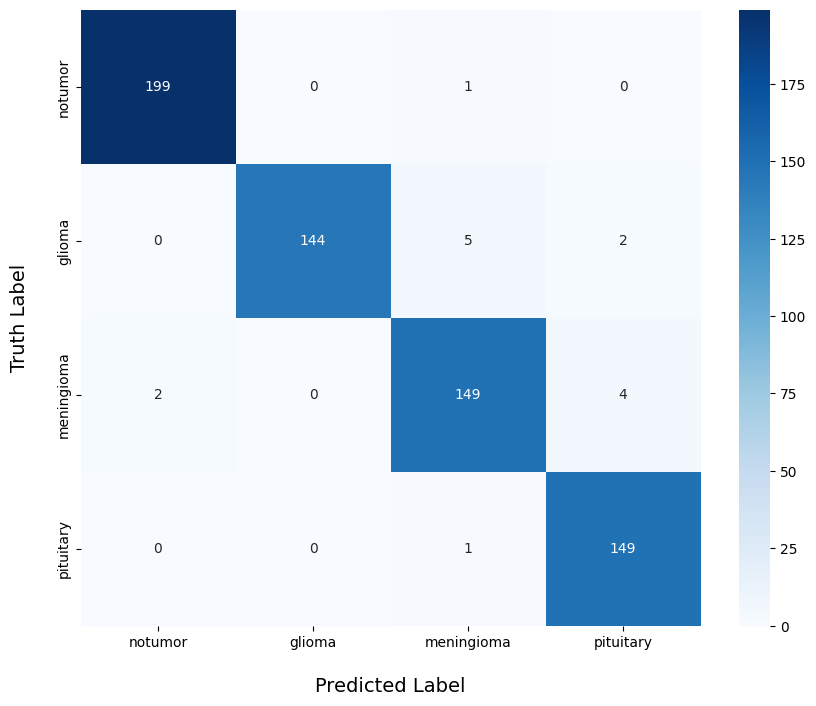

In [ ]:
cm = confusion_matrix(gen_labels_test_set, best_model_preds)
labels = set([label[2] for label in test_dataset])
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label', labelpad=20, fontsize=14)
plt.ylabel('Truth Label', labelpad=20, fontsize=14)
plt.show()